In [ ]:
## Black Friday Dataset EDA and feature Enginerring
## Cleaning and preparing the data for model training 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
#importing the dataset

df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [3]:
## import the test data 

df_test=pd.read_csv('test.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7.0,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17.0,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1.0,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1.0,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1.0,C,1,0.0,4.0,5.0,12.0


In [4]:
##merge the both  dataset

df=df_train.append(df_test) ##append niche se hota hai data add but merge me
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
##Basic

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192426 entries, 0 to 102071
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     192426 non-null  int64  
 1   Product_ID                  192426 non-null  object 
 2   Gender                      192425 non-null  object 
 3   Age                         192425 non-null  object 
 4   Occupation                  192424 non-null  float64
 5   City_Category               192424 non-null  object 
 6   Stay_In_Current_City_Years  192424 non-null  object 
 7   Marital_Status              192424 non-null  float64
 8   Product_Category_1          192424 non-null  float64
 9   Product_Category_2          132664 non-null  float64
 10  Product_Category_3          58564 non-null   float64
 11  Purchase                    90353 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 19.1+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.924260e+05,192424.000000,192424.000000,192424.000000,132664.000000,58564.000000,90353.000000
mean,1.002884e+06,8.086881,0.410578,5.280428,9.853125,12.660440,9292.215732
std,1.751930e+03,6.532374,0.491940,3.735095,5.097531,4.121106,4963.411008
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001323e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5859.000000
50%,1.002859e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8050.000000
75%,1.004375e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12042.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'],axis=1,inplace=True)

##axis 1 means column vise and axis 0 means row wise ..

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
## fixing the catorgical feature

pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
102067,0,1
102068,0,1
102069,0,1
102070,1,0


In [9]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [10]:
## handling the categorical geature Age

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '46-',
       nan], dtype=object)

In [16]:
pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-,46-50,51-55,55+
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
102067,0,0,1,0,0,0,0
102068,0,0,1,0,0,0,0
102069,0,0,1,0,0,0,0
102070,0,0,1,0,0,0,0


In [17]:
df['Age']=df['Age'].map({'0-17':1,'18-28':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,5,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [19]:
## second technique
from sklearn import preprocessing

# Label_encoder object  knows how to understand word labels . 

label_encoder = preprocessing.LabelEncoder()

#Encodes labels in column 'species'
df['Age']=label_encoder.fit_transform(df['Age'])

df['Age'].unique()



array([0, 5, 1, 3, 4, 2])

In [24]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [25]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [27]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,5,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [28]:
## drop city category 
df.drop('City_Category',axis=1,inplace=True)

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,5,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [30]:
## misssing value 
df.isnull().sum()


Product_ID                         0
Gender                             1
Age                                0
Occupation                         2
Stay_In_Current_City_Years         2
Marital_Status                     2
Product_Category_1                 2
Product_Category_2             59762
Product_Category_3            133862
Purchase                      102073
B                                  0
C                                  0
dtype: int64

In [33]:
## Focus on replacing missing value 

df['Product_Category_1'].unique()


array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [34]:
df['Product_Category_2'].value_counts()

8.0     22241
14.0    19588
2.0     17486
16.0    15275
15.0    13220
5.0      9199
4.0      9009
6.0      5842
11.0     4949
17.0     4780
13.0     3758
9.0      2051
12.0     1953
10.0     1064
18.0     1039
3.0      1005
7.0       205
Name: Product_Category_2, dtype: int64

In [38]:
df['Product_Category_2'].mode()[0]

8.0

In [37]:
##Replace the missing values with mode 

df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

 

In [39]:
df['Product_Category_2'].isnull().sum()

0

In [41]:
## product caterogy 3 missing value 

df['Product_Category_3'].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [43]:
df['Product_Category_3'].value_counts()

16.0    11398
15.0     9878
14.0     6498
17.0     5868
5.0      5865
8.0      4379
9.0      4127
12.0     3241
13.0     1914
6.0      1681
18.0     1562
4.0       666
11.0      654
10.0      621
3.0       212
Name: Product_Category_3, dtype: int64

In [44]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [50]:
## replace mssing value 

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [51]:
df['Product_Category_3'].isnull().sum()

0

In [52]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1.0,5,16.0,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [54]:
df.shape

(192426, 12)

In [56]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [63]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')

<ipython-input-63-6b910dfae2c4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')


In [64]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1.0,5,16.0,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192426 entries, 0 to 102071
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  192426 non-null  object 
 1   Gender                      192425 non-null  float64
 2   Age                         192426 non-null  int64  
 3   Occupation                  192424 non-null  float64
 4   Stay_In_Current_City_Years  192424 non-null  object 
 5   Marital_Status              192424 non-null  float64
 6   Product_Category_1          192424 non-null  float64
 7   Product_Category_2          192426 non-null  float64
 8   Product_Category_3          192426 non-null  float64
 9   Purchase                    90353 non-null   float64
 10  B                           192426 non-null  uint8  
 11  C                           192426 non-null  uint8  
dtypes: float64(7), int64(1), object(2), uint8(2)
memory usage: 16.5+ MB


In [71]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0])

In [72]:
## convert object into integer

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192426 entries, 0 to 102071
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  192426 non-null  object 
 1   Gender                      192425 non-null  float64
 2   Age                         192426 non-null  int64  
 3   Occupation                  192424 non-null  float64
 4   Stay_In_Current_City_Years  192426 non-null  int64  
 5   Marital_Status              192424 non-null  float64
 6   Product_Category_1          192424 non-null  float64
 7   Product_Category_2          192426 non-null  float64
 8   Product_Category_3          192426 non-null  float64
 9   Purchase                    90353 non-null   float64
 10  B                           192426 non-null  int64  
 11  C                           192426 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 19.1+ MB


In [70]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192426 entries, 0 to 102071
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  192426 non-null  object 
 1   Gender                      192425 non-null  float64
 2   Age                         192426 non-null  int64  
 3   Occupation                  192424 non-null  float64
 4   Stay_In_Current_City_Years  192424 non-null  object 
 5   Marital_Status              192424 non-null  float64
 6   Product_Category_1          192424 non-null  float64
 7   Product_Category_2          192426 non-null  float64
 8   Product_Category_3          192426 non-null  float64
 9   Purchase                    90353 non-null   float64
 10  B                           192426 non-null  int64  
 11  C                           192426 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 19.1+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


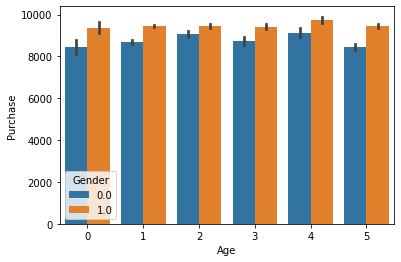

In [75]:
##visualization

sns.barplot('Age','Purchase',hue='Gender',data=df)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


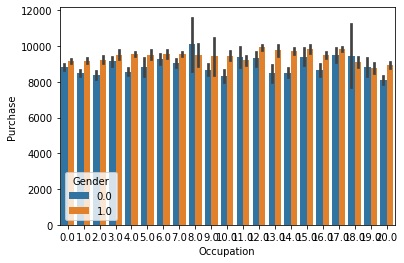

In [76]:
## purchasing of men is high then women 

## visualization of purchase with occupation 

sns.barplot('Occupation','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


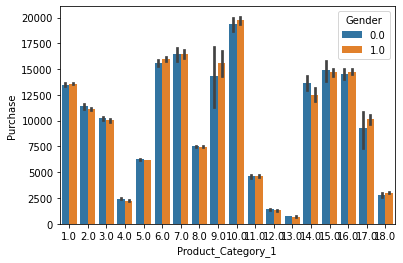

In [77]:
## purchase  of product _category_1

sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


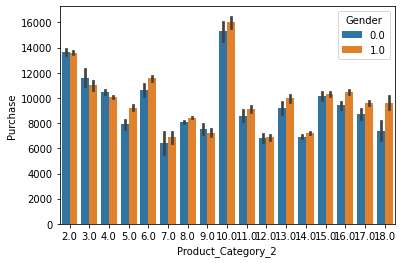

In [78]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


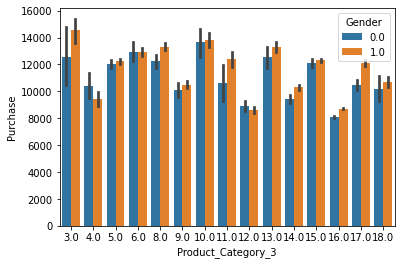

In [79]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [80]:
## Feature Scaling

df_test=df[df['Purchase'].isnull()]

In [81]:
df_train=df[~df['Purchase'].isnull()]

In [97]:
X=df_train.drop('Purchase',axis=1)

In [98]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0.0,0,10.0,2,0.0,3.0,8.0,16.0,0,0
1,P00248942,0.0,0,10.0,2,0.0,1.0,6.0,14.0,0,0
2,P00087842,0.0,0,10.0,2,0.0,12.0,8.0,16.0,0,0
3,P00085442,0.0,0,10.0,2,0.0,12.0,14.0,16.0,0,0
4,P00285442,1.0,5,16.0,4,0.0,8.0,8.0,16.0,0,1


In [99]:
y=df_train['Purchase']

In [100]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_test, y_train = train_test_split(X,y, test_size=0.33,random_state=42)

In [109]:
#X_train.drop('Product_ID',axis=1,inplace=True)

X_test.drop('Product_ID',axis=1,inplace=True)

In [110]:
X_train.drop('Product_ID',axis=1,inplace=True)

AttributeError: ignored

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
## train yor model 

